In [1]:
from lxml import etree

def parse_graphml_in_chunks(file_path):
    context = etree.iterparse(file_path, events=("start", "end"))
    nodes = {}
    edges = []
    
    for event, elem in context:
        if event == "end" and elem.tag == "{http://graphml.graphdrawing.org/xmlns}node":
            # Process node
            node_id = elem.attrib['id']
            # Extract other attributes if needed, e.g. CVE_Severity
            attributes = {data.attrib['key']: data.text for data in elem.findall("{http://graphml.graphdrawing.org/xmlns}data")}
            nodes[node_id] = attributes
            elem.clear()  # Clear memory

        elif event == "end" and elem.tag == "{http://graphml.graphdrawing.org/xmlns}edge":
            # Process edge
            source = elem.attrib['source']
            target = elem.attrib['target']
            # Extract edge attributes
            attributes = {data.attrib['key']: data.text for data in elem.findall("{http://graphml.graphdrawing.org/xmlns}data")}
            edges.append((source, target, attributes))
            elem.clear()  # Clear memory
            
    return nodes, edges

# Usage
nodes, edges = parse_graphml_in_chunks('../data/graph_metric.graphml')

In [10]:
print(len(nodes))
for key,value in nodes.items():
    print(key, value)
    break
print(len(edges))
print(edges[:10])

59152712
n0 {'labels': ':Artifact', 'id': 'com.splendo.kaluga:alerts-androidlib', 'found': 'true'}
178155040
[('n2', 'n13', {'label': 'relationship_AR'}), ('n1', 'n14', {'label': 'relationship_AR'}), ('n1', 'n7', {'label': 'relationship_AR'}), ('n1', 'n8', {'label': 'relationship_AR'}), ('n2', 'n9', {'label': 'relationship_AR'}), ('n2', 'n4', {'label': 'relationship_AR'}), ('n1', 'n11', {'label': 'relationship_AR'}), ('n1', 'n3', {'label': 'relationship_AR'}), ('n1', 'n6', {'label': 'relationship_AR'}), ('n2', 'n10', {'label': 'relationship_AR'})]


In [1]:
def build_igraph_from_nodes_edges(nodes, edges):
    # Create an empty graph
    g = ig.Graph(directed=True)

    # Add all nodes first
    node_ids = list(nodes.keys())  # Get all node IDs
    g.add_vertices(node_ids)  # Add nodes by their IDs

    # Add all edges
    for edge in edges:
        source, target, attributes = edge
        if source in node_ids and target in node_ids:
            g.add_edge(source, target, **attributes)
        else:
            print(f"Missing node for edge: {source} -> {target}")

    return g

# Example usage:
g = build_igraph_from_nodes_edges(nodes, edges)

NameError: name 'nodes' is not defined

## print out the attributes of first 10 nodes

In [ ]:
for node, attrs in list(G.nodes(data=True))[:10]:
    print(f"Node {node}: {attrs}")


## print our the attributes of first 10 edges

In [ ]:
for u, v, attrs in list(G.edges(data=True))[:10]:
    print(f"Edge {u}-{v}: {attrs}")

## measure the basic centrality

In [1]:
degree_top10 = [('n1', 0.3), ('n2', 0.5), ('n3', 0.1), ('n4', 0.2), ('n5', 0.4), 
                ('n6', 0.7), ('n7', 0.3), ('n8', 0.6), ('n9', 0.2), ('n10', 0.1)]
betweenness_top10 = [('n2', 0.4), ('n3', 0.2), ('n5', 0.6), ('n6', 0.3), ('n7', 0.5), 
                     ('n8', 0.8), ('n1', 0.3), ('n10', 0.4), ('n12', 0.3), ('n13', 0.6)]
eigenvector_top10 = [('n1', 0.7), ('n3', 0.3), ('n4', 0.6), ('n6', 0.8), ('n8', 0.2), 
                     ('n11', 0.5), ('n14', 0.6), ('n15', 0.3), ('n16', 0.4), ('n9', 0.2)]

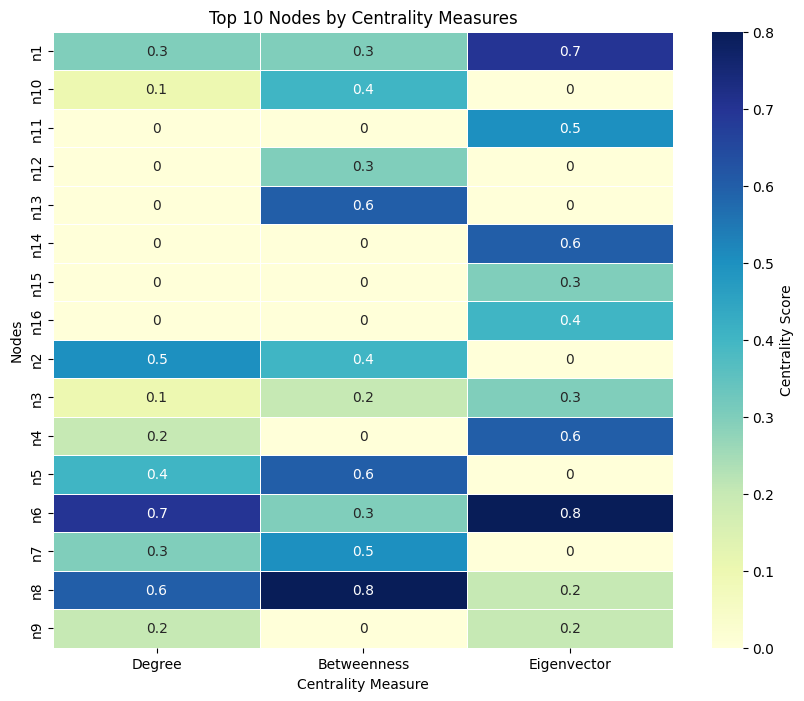

In [3]:
# Convert lists of tuples into dictionaries
degree_dict = dict(degree_top10)
betweenness_dict = dict(betweenness_top10)
eigenvector_dict = dict(eigenvector_top10)

# Collect all unique nodes and sort them
all_nodes = sorted(set(degree_dict) | set(betweenness_dict) | set(eigenvector_dict))

# Create a DataFrame with nodes as rows and centralities as columns
data = pd.DataFrame({
    'Degree': [degree_dict.get(node, 0) for node in all_nodes],
    'Betweenness': [betweenness_dict.get(node, 0) for node in all_nodes],
    'Eigenvector': [eigenvector_dict.get(node, 0) for node in all_nodes]
}, index=all_nodes)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Centrality Score'}, linewidths=0.5)

# Add labels and title
plt.title('Top 10 Nodes by Centrality Measures')
plt.xlabel('Centrality Measure')
plt.ylabel('Nodes')
plt.show()
